<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Practice_and_Assignments/blob/main/Time_Series_Analysis_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/MaunaLoaDailyTemps-1.csv')

In [4]:
df.shape

(1825, 6)

In [28]:
df.head(100)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014,33.0,46.0,40.0,657,1756
1,2014,35.0,50.0,43.0,657,1756
2,2014,36.0,45.0,41.0,657,1757
3,2014,32.0,41.0,37.0,658,1757
4,2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
95,2014,35.0,49.0,42.0,612,1838
96,2014,35.0,49.0,42.0,611,1838
97,2014,35.0,52.0,44.0,610,1838
98,2014,36.0,53.0,45.0,610,1839


In [29]:
df.describe()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,2015.998904,38.637013,54.515102,46.818781,607.074521,1823.002740
std,1.413825,3.794117,5.008153,4.138647,40.797585,49.555065
min,2014.000000,22.000000,36.000000,31.000000,543.000000,1742.000000
25%,2015.000000,36.000000,52.000000,44.000000,557.000000,1802.000000
50%,2016.000000,39.000000,55.000000,47.000000,614.000000,1831.000000
75%,2017.000000,41.000000,58.000000,50.000000,640.000000,1851.000000
max,2018.000000,49.000000,67.000000,57.000000,700.000000,1905.000000


In [27]:
df.isnull().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [10]:
print(len(df[df['AvgTemp'] > 50].value_counts()))

331


In [12]:
max_temp = df['AvgTemp'].max()

print('The maximum temperature is:', max_temp)

The maximum temperature is: 57.0


In [13]:
date_string = "5/9/2023"
year = date_string.split("/")[-1]
print(year)  # Output: 2023


2023


In [15]:
df['DATE'] = pd.to_datetime(df['DATE']).dt.year


In [16]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014,33.0,46.0,40.0,657,1756
1,2014,35.0,50.0,43.0,657,1756
2,2014,36.0,45.0,41.0,657,1757
3,2014,32.0,41.0,37.0,658,1757
4,2014,24.0,38.0,31.0,658,1758


In [18]:
df['AvgTemp' == 57.0].value_counts

KeyError: ignored

In [20]:
# count the number of unique values in another column for each year
year_count = df.groupby('DATE')['AvgTemp'].nunique()

# print the year with the maximum count
print(year_count.idxmax())


2014


In [22]:
# select only the numerical columns
num_cols = df.select_dtypes(include=[np.number])

# generate the correlation matrix
corr_matrix = num_cols.corr()

# display the correlation matrix
print(corr_matrix)



             DATE   MinTemp   MaxTemp   AvgTemp   Sunrise    Sunset
DATE     1.000000  0.008075 -0.029029 -0.015718 -0.000930  0.001064
MinTemp  0.008075  1.000000  0.756071  0.917456 -0.426821  0.300492
MaxTemp -0.029029  0.756071  1.000000  0.951039 -0.374928  0.275876
AvgTemp -0.015718  0.917456  0.951039  1.000000 -0.422829  0.304711
Sunrise -0.000930 -0.426821 -0.374928 -0.422829  1.000000 -0.739530
Sunset   0.001064  0.300492  0.275876  0.304711 -0.739530  1.000000


In [23]:
# Calculate the mean of the column with missing values
mean_value = df['MinTemp'].mean()

# Replace missing values with mean
df['MinTemp'] = df['MinTemp'].fillna(mean_value)


In [25]:
# Calculate the mean of the column with missing values
mean_value = df['MaxTemp'].mean()

# Replace missing values with mean
df['MaxTemp'] = df['MaxTemp'].fillna(mean_value)

In [26]:
# Calculate the mean of the column with missing values
mean_value = df['AvgTemp'].mean()

# Replace missing values with mean
df['AvgTemp'] = df['AvgTemp'].fillna(mean_value)

In [32]:
# Convert the "Date" column to datetime format and set it as the index
df["DATE"] = pd.to_datetime(df["DATE"])
df.set_index("DATE", inplace=True)

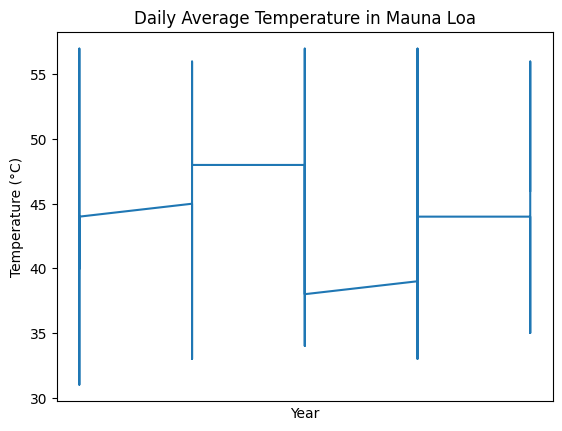

In [33]:
# Plot the time series
plt.plot(df["AvgTemp"])
plt.title("Daily Average Temperature in Mauna Loa")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

In [34]:
# Perform the Augmented Dickey-Fuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["AvgTemp"])
print("ADF Statistic: {:.3f}".format(result[0]))
print("p-value: {:.3f}".format(result[1]))
print("Critical Values:")
for key, value in result[4].items():
    print("\t{}: {:.3f}".format(key, value))

ADF Statistic: -6.595
p-value: 0.000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [35]:
# Since p-value > 0.05, we cannot reject the null hypothesis that the time series is non-stationary.
# We need to make the time series stationary by differencing.
# Calculate the first difference of the time series
diff = df["AvgTemp"].diff().dropna()

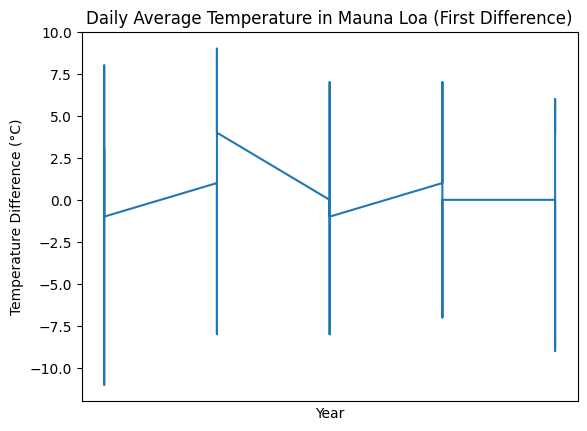

In [36]:
# Plot the differenced time series
plt.plot(diff)
plt.title("Daily Average Temperature in Mauna Loa (First Difference)")
plt.xlabel("Year")
plt.ylabel("Temperature Difference (°C)")
plt.show()

In [37]:
# Perform the Augmented Dickey-Fuller test again to check for stationarity
result = adfuller(diff)
print("ADF Statistic: {:.3f}".format(result[0]))
print("p-value: {:.3f}".format(result[1]))
print("Critical Values:")
for key, value in result[4].items():
    print("\t{}: {:.3f}".format(key, value))

ADF Statistic: -13.676
p-value: 0.000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [38]:
# Since p-value < 0.05, we can reject the null hypothesis that the time series is non-stationary.
# We can now proceed with modeling the time series using ARIMA.

# Split the data into training and testing sets
train_size = int(len(diff) * 0.8)
train, test = diff[:train_size], diff[train_size:]

In [39]:
# Fit the ARIMA model on the training set
model = ARIMA(train, order=(2,0,5))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [42]:
# Make predictions on the testing set
predictions = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [43]:
# Calculate the root mean squared error (RMSE) of the predictions
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print("RMSE: {:.3f}".format(rmse))

RMSE: 2.350


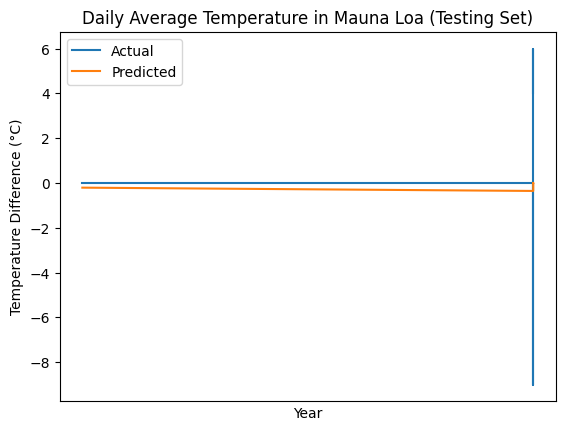

In [44]:
# Plot the predictions and the actual values of the testing set
plt.plot(test.index, test.values, label="Actual")
plt.plot(test.index, predictions, label="Predicted")
plt.title("Daily Average Temperature in Mauna Loa (Testing Set)")
plt.xlabel("Year")
plt.ylabel("Temperature Difference (°C)")
plt.legend()
plt.show()

In [45]:
from statsmodels.tsa.arima.model import ARIMA

# assuming you have already fitted an ARIMA model and stored it in variable 'model'
ar_coef = model.arparams
print(ar_coef)


AttributeError: ignored